In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline

In [21]:
df = pd.read_csv('D:\DataSci\Resources\laptop_pricing_dataset_mod2.csv')
#df.drop(columns="Unnamed: 0.1", inplace=True)
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
5,5,5,Dell,3,1,1,5,15.6,0.551724,8,256,4.85100,1016,Low,1,0
6,6,6,HP,3,3,1,5,15.6,0.551724,8,256,4.63050,1117,Low,1,0
7,7,7,Acer,3,2,1,5,15.0,0.551724,4,256,4.85100,866,Low,0,1
8,8,8,Dell,3,1,1,5,15.6,0.862069,4,256,5.07150,812,Low,1,0
9,9,9,Acer,3,3,1,7,15.0,0.620690,8,256,4.85100,1068,Low,0,1


In [15]:
print(df.columns)


Index(['Manufacturer', 'Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_inch',
       'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_pounds', 'Price',
       'Price-binned', 'Screen-Full_HD', 'Screen-IPS_panel'],
      dtype='object')


<Axes: xlabel='CPU_frequency', ylabel='Price'>

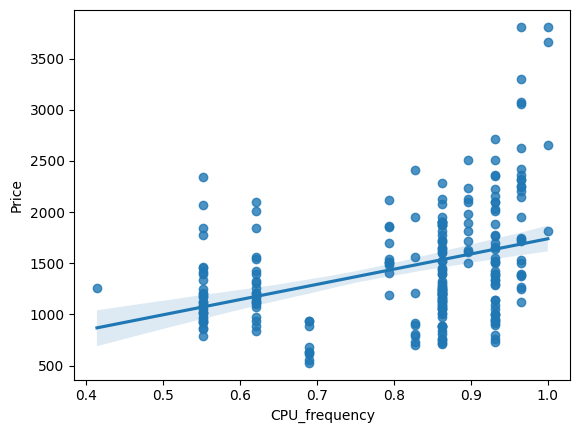

In [16]:
# Generating regression plots for diff variables against price
sns.regplot(x='CPU_frequency', y='Price', data= df)


<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

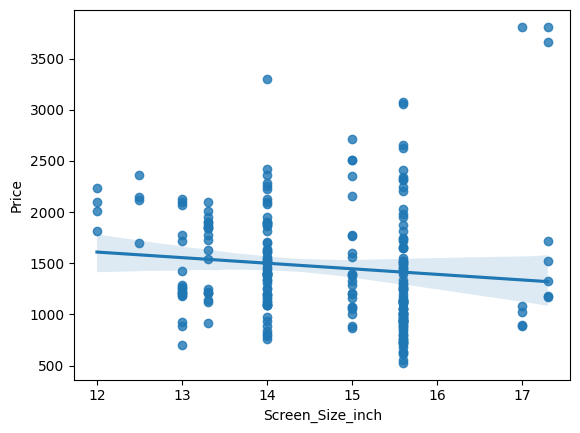

In [17]:
sns.regplot(x='Screen_Size_inch', y='Price', data= df)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

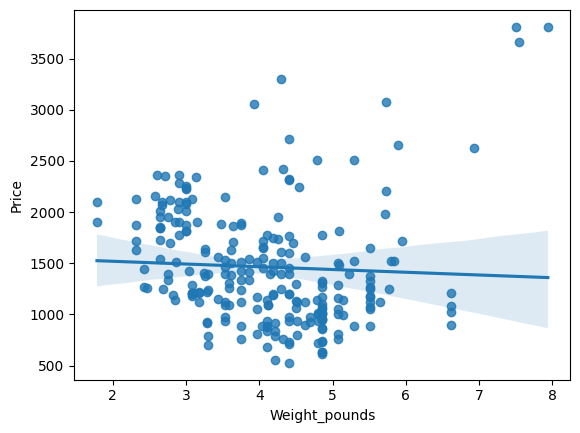

In [18]:
sns.regplot(x='Weight_pounds', y='Price', data= df)

<Axes: xlabel='Category', ylabel='Price'>

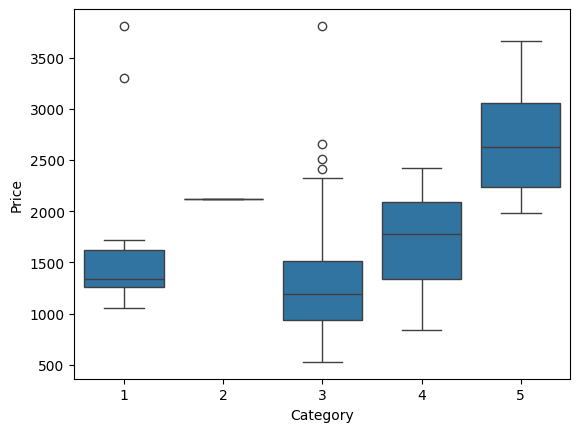

In [20]:
#Generate Box plots for the different feature that hold categorical values.
sns.boxplot(x="Category", y="Price", data = df)

In [39]:
df_sub = df[["GPU", "CPU_core","Price"]]
df_group = df_sub.groupby(["GPU", "CPU_core"],as_index=False).mean()
df_group_piv = df_group.pivot(index="GPU", columns="CPU_core")
df_group_piv

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

AttributeError: 'Axes' object has no attribute 'xlabel'

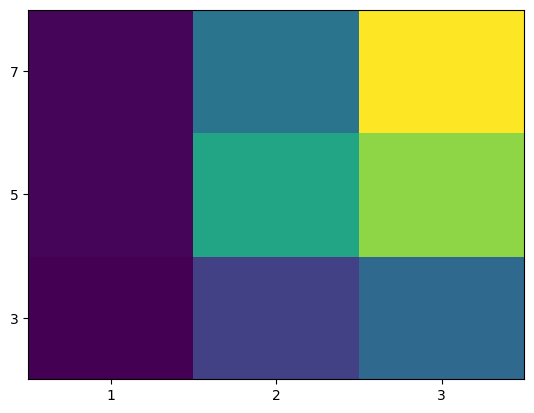

In [ ]:
fig,ax = plt.subplots()
im = ax.pcolor(df_group_piv)
row_labels = df_group_piv.index
col_labels = df_group_piv.columns.levels[1]


ax.set_xticks(np.arange(df_group_piv.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_group_piv.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(row_labels)
ax.set_yticklabels(col_labels)


In [48]:
row_labels = df_group_piv.index
col_labels = df_group_piv.columns.levels[1]
col_labels

Index([3, 5, 7], dtype='int64', name='CPU_core')